# MOA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import datetime
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics 

## Reading Data

In [3]:
# Reading train dataset
train = pd.read_csv("/home/abdelmoneim/سطح المكتب/for graduation project/dataset/train_features.csv")
train.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [4]:
# Reading test dataset
test = pd.read_csv("/home/abdelmoneim/سطح المكتب/for graduation project/dataset/test_features.csv")
test.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_0004d9e33,trt_cp,24,D1,-0.5458,0.1306,-0.5135,0.4408,1.5500,-0.1644,...,0.0981,0.7978,-0.1430,-0.2067,-0.2303,-0.1193,0.0210,-0.0502,0.1510,-0.7750
1,id_001897cda,trt_cp,72,D1,-0.1829,0.2320,1.2080,-0.4522,-0.3652,-0.3319,...,-0.1190,-0.1852,-1.0310,-1.3670,-0.3690,-0.5382,0.0359,-0.4764,-1.3810,-0.7300
2,id_002429b5b,ctl_vehicle,24,D1,0.1852,-0.1404,-0.3911,0.1310,-1.4380,0.2455,...,-0.2261,0.3370,-1.3840,0.8604,-1.9530,-1.0140,0.8662,1.0160,0.4924,-0.1942
3,id_00276f245,trt_cp,24,D2,0.4828,0.1955,0.3825,0.4244,-0.5855,-1.2020,...,0.1260,0.1570,-0.1784,-1.1200,-0.4325,-0.9005,0.8131,-0.1305,0.5645,-0.5809
4,id_0027f1083,trt_cp,48,D1,-0.3979,-1.2680,1.9130,0.2057,-0.5864,-0.0166,...,0.4965,0.7578,-0.1580,1.0510,0.5742,1.0900,-0.2962,-0.5313,0.9931,1.8380


In [5]:
#Reading target variable columns
target = pd.read_csv("/home/abdelmoneim/سطح المكتب/for graduation project/dataset/train_targets_scored.csv")
target.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- The Train dataset comprises of 23,814 row , with 876 features for each . There are 772 gene expression feature and they are represented by ‘g-’, There are 100 cell viability feature and they are represented by ‘c-’ ,

There are 206 scored target which we need to predict. The targets are Binary in Nature.we are also provided with 402 non-scored target.Each row represents a sample which is associated with a unique name sig_id .

## Exploratory Data Analysis (EDA)

In [10]:
# CHECKING NUMBER OF UNIQUE VALUES
print(train.shape , test.shape)
len(train.sig_id.unique()) , len(test.sig_id.unique())

(23814, 876) (3982, 876)


(23814, 3982)

In [11]:
# CHECKING MISSING VALUES
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 876 entries, sig_id to c-99
dtypes: float64(872), int64(1), object(3)
memory usage: 159.2+ MB


In [13]:
train.describe()

,cp_time,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,...,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,...,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,...,-0.566175,-0.565975,-0.589975,-0.568700,-0.563775,-0.567975,-0.552575,-0.561000,-0.592600,-0.562900
50%,48.000000,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,...,-0.009900,0.003250,-0.009100,-0.013750,-0.003300,-0.010250,-0.001250,-0.006800,0.014000,-0.019500
75%,72.000000,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,...,0.457750,0.461500,0.445675,0.452900,0.470900,0.444750,0.465225,0.446400,0.461275,0.438650
max,72.000000,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,...,4.069000,3.960000,3.927000,3.596000,3.747000,2.814000,3.505000,2.924000,3.111000,3.805000


## Gene Expression Features
* Gene expression is the amount and type of proteins that are expressed in a cell at any given point in time. 
* There are 772 gene expression features and they have g- prefix (g-0 to g-771). Each gene expression feature represents the expression of one particular gene, so there are 772 individual genes are being monitored in this assay.

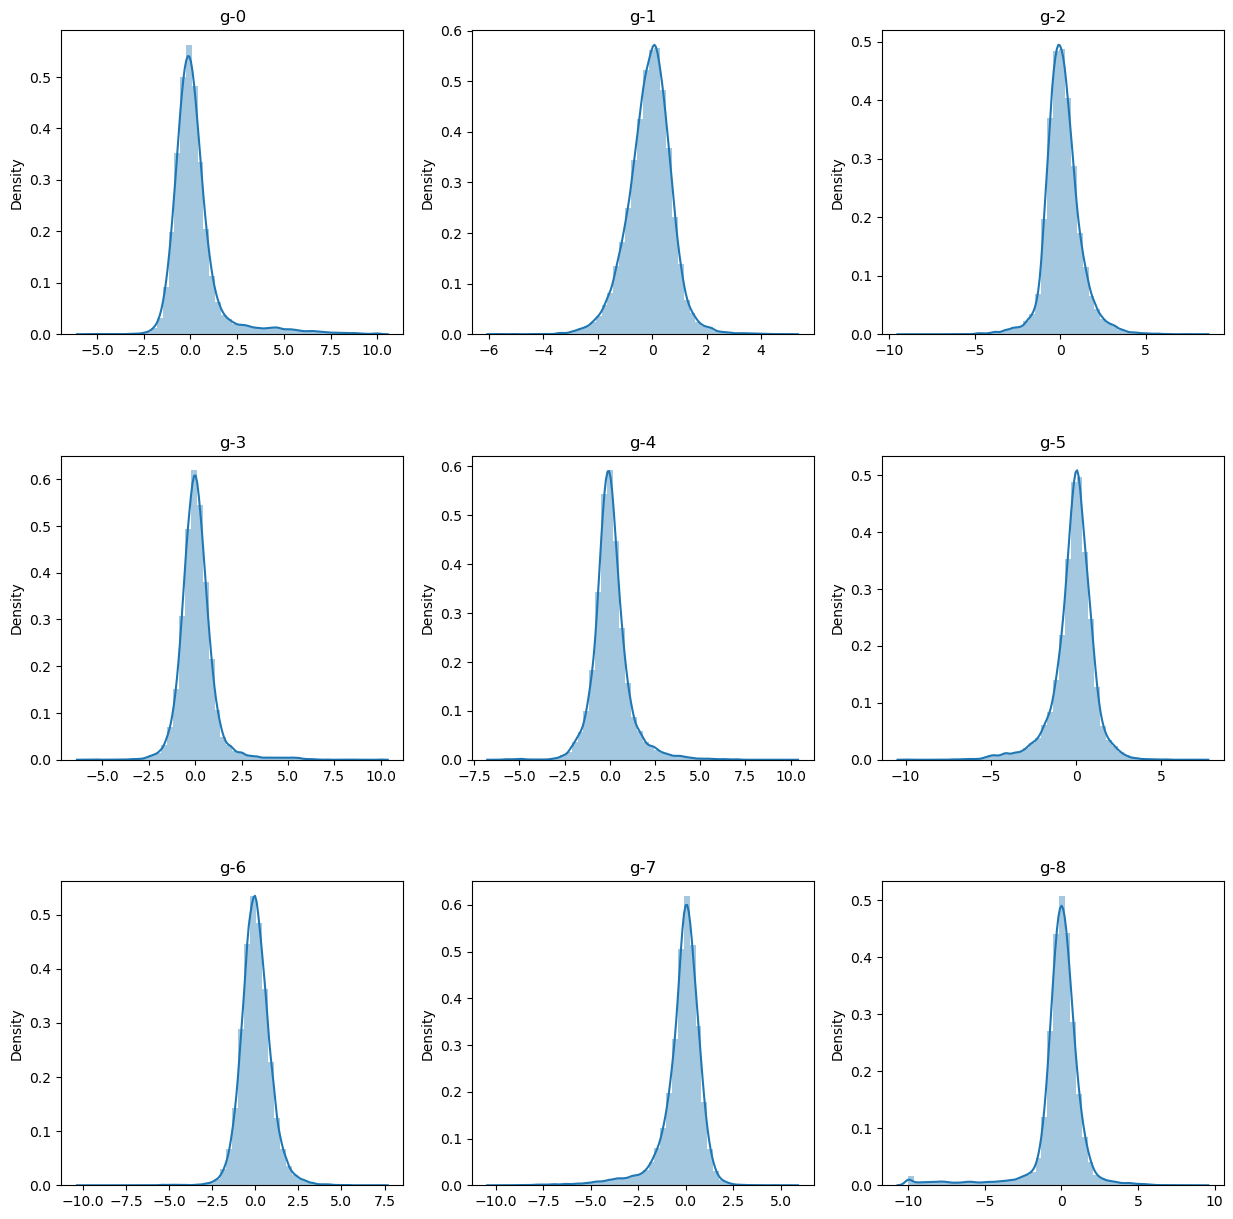

In [9]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,9)
for i in range(9):
    plt.subplot(3,3,i+1)
    sns.distplot(train.iloc[:,i+4])
    plt.title(train.columns[i+4])
    plt.xlabel('')

plt.subplots_adjust(hspace=0.4)
plt.show()

## Cell Viability Features
* Cell viability is a measure of the proportion of live, healthy cells within a population. Cell viability assays are used to determine the overall health of cells, optimize culture or experimental conditions.

* There are 100 cell-viability features and they have c- prefix (c-0 to c-99). Each cell-viability feature represents viability of one particular cell line, and all experiments are based on a set of similar cells.

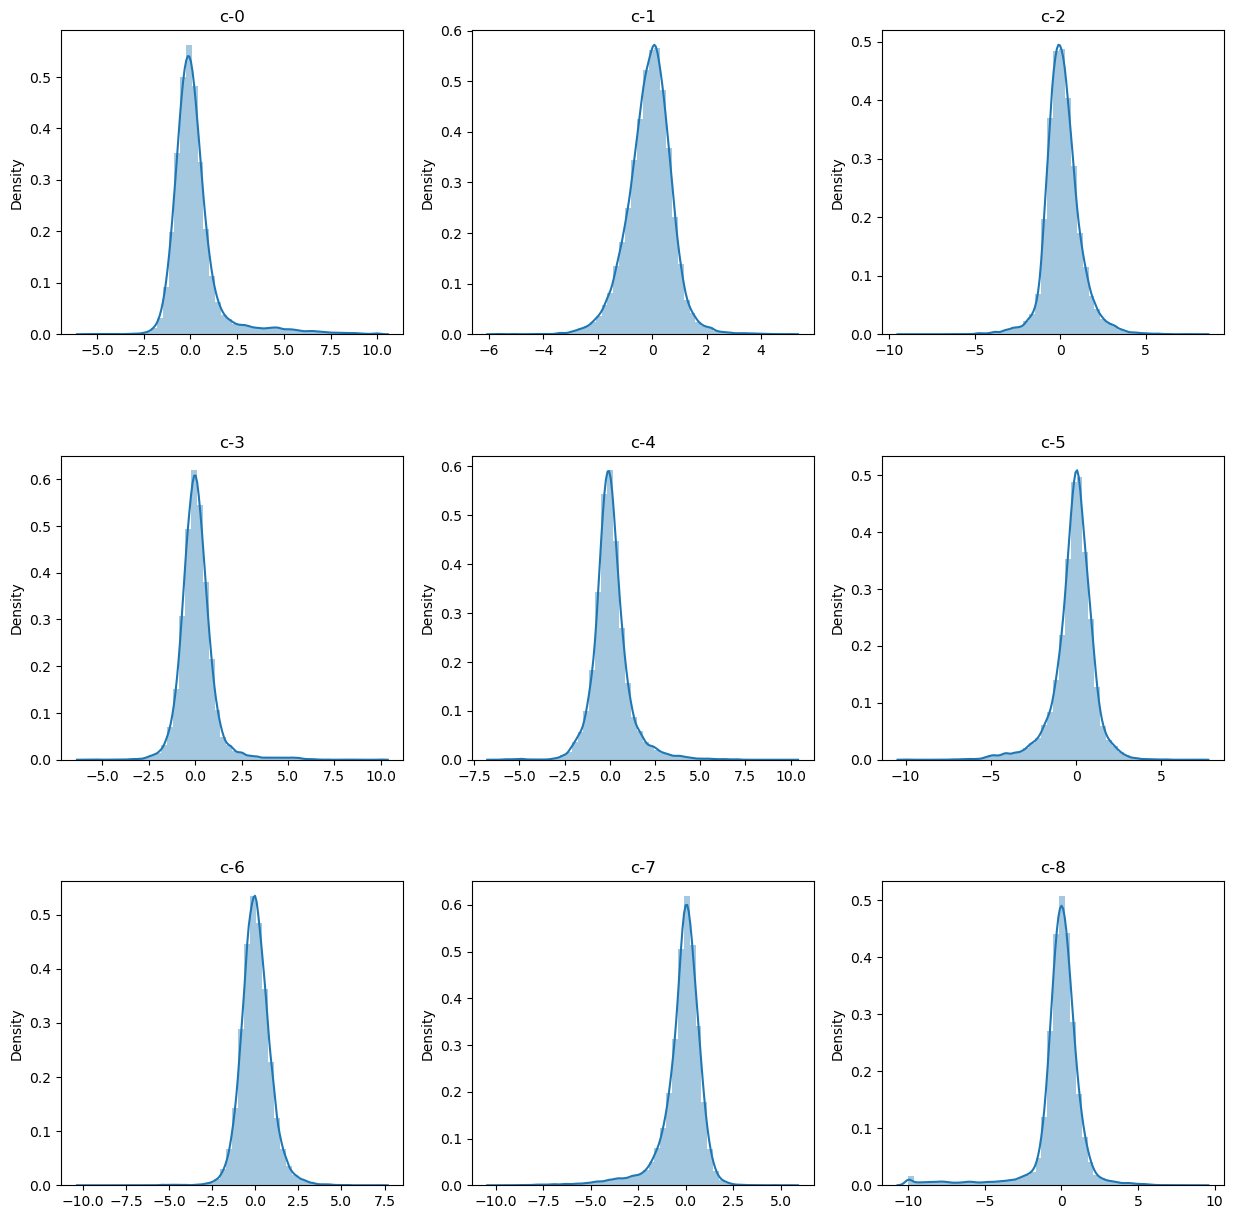

In [10]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,9)
for i in range(9):
    plt.subplot(3,3,i+1)
    sns.distplot(train.iloc[:,i+4])
    plt.title(train.columns[i+776])
    plt.xlabel('')

plt.subplots_adjust(hspace=0.4)
plt.show()

- THE TRAIN FEATURES AND TEST FEATURES DATASET CONTAINS 3 CATEGORICAL FEATURES 'cp_type', 'cp_time', 'cp_dose' .

Text(0.5, 1.0, 'CP_TYPE IN TEST FEATURES')

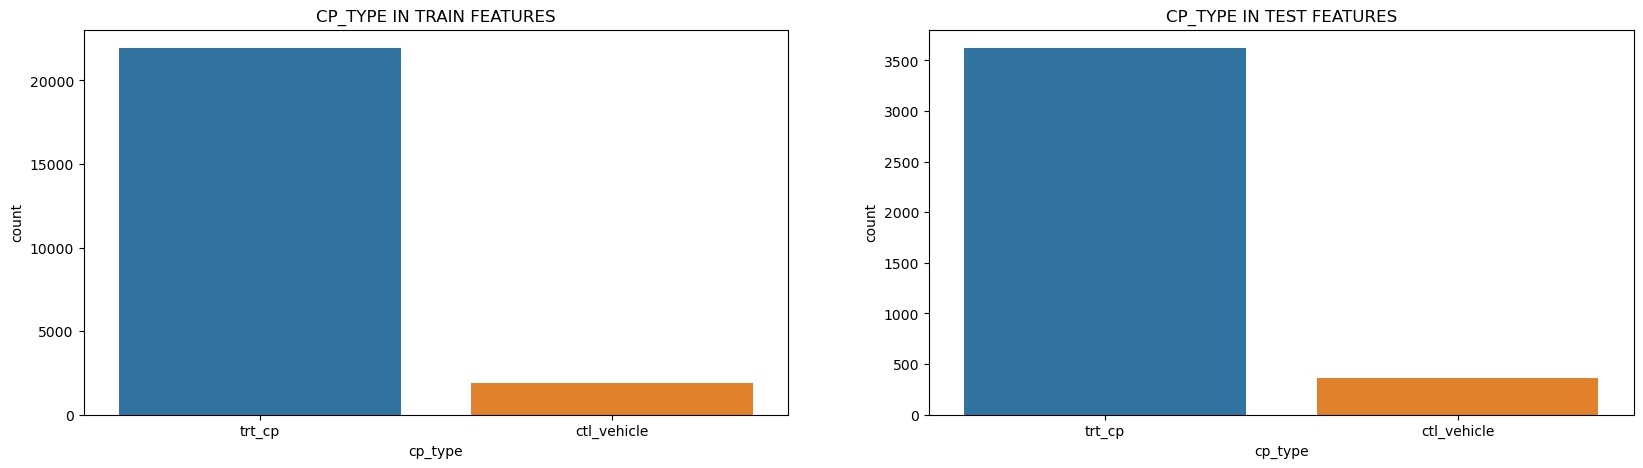

In [11]:
plt.figure(figsize = (20 , 5))
plt.subplot(121)
sns.countplot(x = 'cp_type' , data = train)
plt.title('CP_TYPE IN TRAIN FEATURES')
plt.subplot(122)
sns.countplot(x = 'cp_type' , data = test)
plt.title('CP_TYPE IN TEST FEATURES')

- ### cp_type
 cp_type is categorical feature in the dataset and it is a binary feature. It either means that samples are treated with a compound (trt_cp) or with a control perturbation (ctl_vehicle). Samples treated with control perturbations have no MoAs, thus all of their scored and non-scored target labels are zeros.

Text(0.5, 1.0, 'cp_time IN TEST FEATURES')

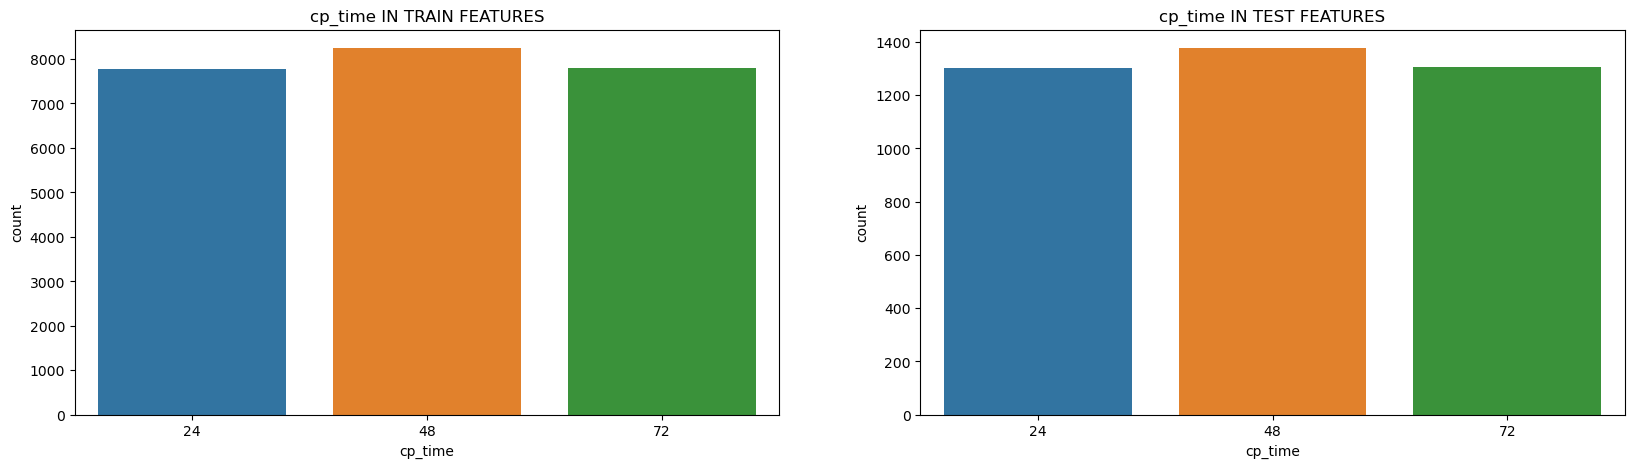

In [12]:
plt.figure(figsize = (20 , 5))
plt.subplot(121)
sns.countplot(x = 'cp_time' , data = train)
plt.title('cp_time IN TRAIN FEATURES')
plt.subplot(122)
sns.countplot(x = 'cp_time' , data = test)
plt.title('cp_time IN TEST FEATURES')

- ### cp_time
 cp_time is categorical feature in the dataset and it has three unique values; 24, 48 and 72 hours. It indicates the treatment durations of the samples. Sample counts of different cp_time values are very consistent and close to each other in different targets. Sample counts are either extremely close to each other or 48 is slightly higher than the others.

Text(0.5, 1.0, 'cp_dose IN TEST FEATURES')

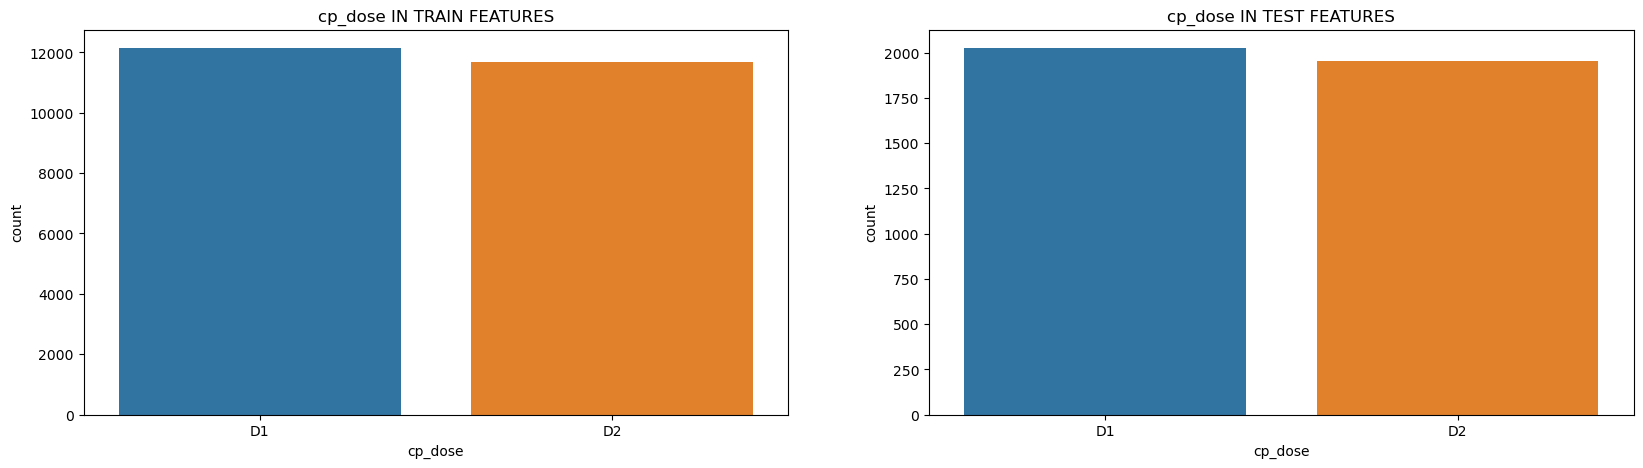

In [13]:
plt.figure(figsize = (20 , 5))
plt.subplot(121)
sns.countplot(x = 'cp_dose' , data = train)
plt.title('cp_dose IN TRAIN FEATURES')
plt.subplot(122)
sns.countplot(x = 'cp_dose' , data = test)
plt.title('cp_dose IN TEST FEATURES')

- ### cp_dose
 cp_dose is categorical feature in the dataset and it is also a binary feature. It indicates whether the dose of the samples are either low (D1) or high (D2).

### Treating Categorical variables for Train and Test Data

In [6]:
train = pd.get_dummies(train, columns = ['cp_time'], drop_first=True)
test = pd.get_dummies(test, columns = ['cp_time'], drop_first=True)

train = pd.get_dummies(train, columns = ['cp_dose'], drop_first=True)
test = pd.get_dummies(test, columns = ['cp_dose'], drop_first=True)

train = pd.get_dummies(train, columns = ['cp_type'], drop_first=True)
test = pd.get_dummies(test, columns = ['cp_type'], drop_first=True)

In [7]:
train.head()


,sig_id,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-94,c-95,c-96,c-97,c-98,c-99,cp_time_48,cp_time_72,cp_dose_D2,cp_type_trt_cp
0,id_000644bb2,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,...,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0,0,0,1
1,id_000779bfc,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,...,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,1,0,1
2,id_000a6266a,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,...,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,1,0,0,1
3,id_0015fd391,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,...,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,1,0,0,1
4,id_001626bd3,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,...,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0,1,1,1


### Understanding Target Variables

In [16]:
x_axis = list(target.columns.values)
sig_id_values  = x_axis[1:]
len(sig_id_values) , sig_id_values[:4]


(206,
 ['5-alpha_reductase_inhibitor',
  '11-beta-hsd1_inhibitor',
  'acat_inhibitor',
  'acetylcholine_receptor_agonist'])

In [17]:
count_of_target = target.iloc[:,1:].sum().values
len(count_of_target) , count_of_target[:3]

(206, array([17, 18, 24]))

Text(0.5, 0, 'TARGET FEATUES')

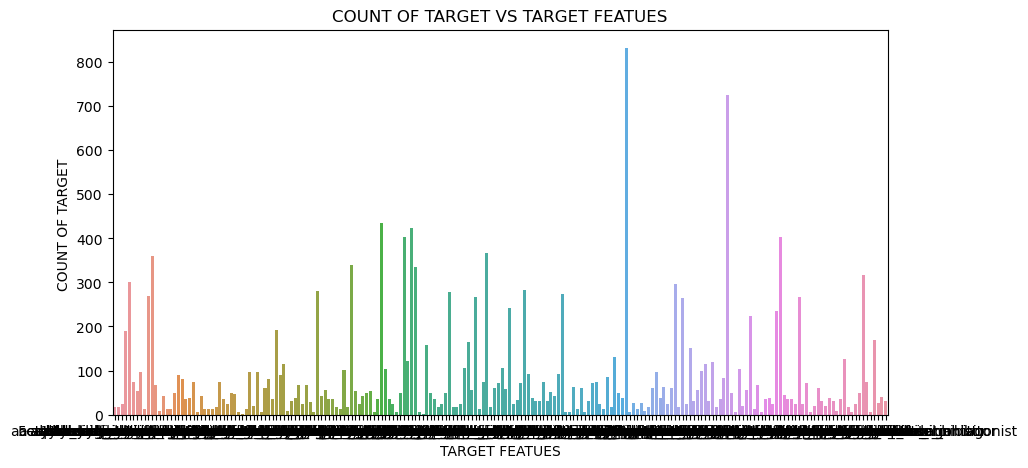

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(sig_id_values, count_of_target)
plt.title('COUNT OF TARGET VS TARGET FEATUES')
plt.ylabel('COUNT OF TARGET ')
plt.xlabel('TARGET FEATUES')

- OBSERVING HOW MANY TIMES A PARTICULAR TARGET APPEARS IN THE DATASET OR SAMPLE

FROM THE ABOVE BARPLOT WE COULD OBSERVE EVERY FEATURE HAS SOME CONTRIBUTION IN MECHANISM OF ACTION IN ATLEAST ONE SAMPLE .WE COULD ALSO OBSERVE SOME OF THE TARGETS OCCUR MORE FREQUENTLY THAN OTHERS.

Text(0, 0.5, 'TARGET FEATUES')

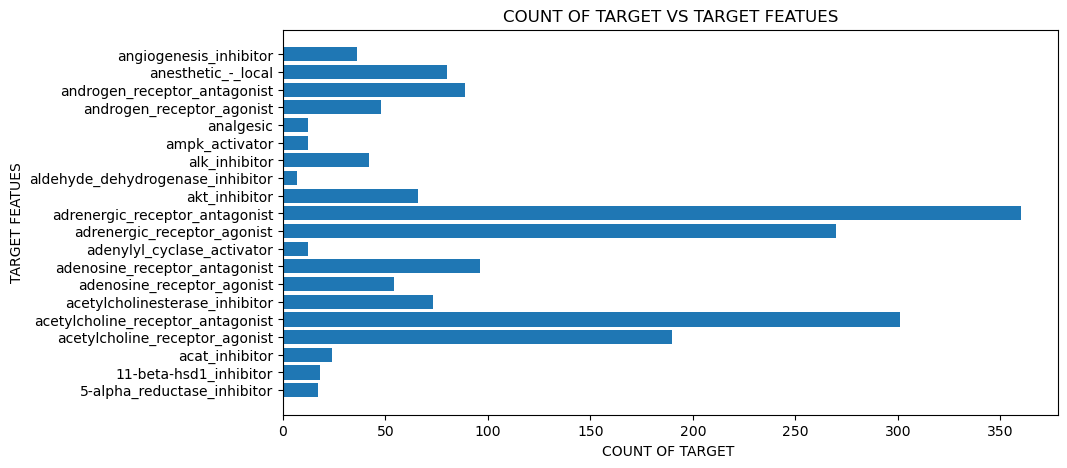

In [19]:
#BARPLOT WITH THE FIRST 20 TARGETS

plt.figure(figsize=(10,5))
plt.barh(sig_id_values[:20], count_of_target[:20])
plt.title('COUNT OF TARGET VS TARGET FEATUES')
plt.xlabel('COUNT OF TARGET ')
plt.ylabel('TARGET FEATUES')

- OBSERVING THE FIRST 20 TARGET APPEARED IN THE DATASET OR SAMPLE .

FROM THE ABOVE BARPLOT WE COULD OBSERVE SOME OF THE TARGETS OCCUR MORE FREQUENTLY THAN OTHERS.HENCE THE DISTRIBUTION OF TARGETS ACROSS SAMPLES ARE VERY IMBALANCED . 

In [20]:
dct =dict(zip(sig_id_values, count_of_target)) 

In [21]:
# SORTING DICTIONARY IN DESCENDING OREDER
sorted_dict = dict(sorted(dct.items(), key=lambda i: i[1], reverse=True))

#TOP 20 TARGETS OCCURING MORE FREQUNTLY WITH THEIR COUNTS
list(sorted_dict.items())[:20]

[('nfkb_inhibitor', 832),
 ('proteasome_inhibitor', 726),
 ('cyclooxygenase_inhibitor', 435),
 ('dopamine_receptor_antagonist', 424),
 ('serotonin_receptor_antagonist', 404),
 ('dna_inhibitor', 402),
 ('glutamate_receptor_antagonist', 367),
 ('adrenergic_receptor_antagonist', 360),
 ('cdk_inhibitor', 340),
 ('egfr_inhibitor', 336),
 ('tubulin_inhibitor', 316),
 ('acetylcholine_receptor_antagonist', 301),
 ('pdgfr_inhibitor', 297),
 ('hmgcr_inhibitor', 283),
 ('calcium_channel_blocker', 281),
 ('flt3_inhibitor', 279),
 ('kit_inhibitor', 273),
 ('adrenergic_receptor_agonist', 270),
 ('sodium_channel_inhibitor', 267),
 ('glucocorticoid_receptor_agonist', 266)]

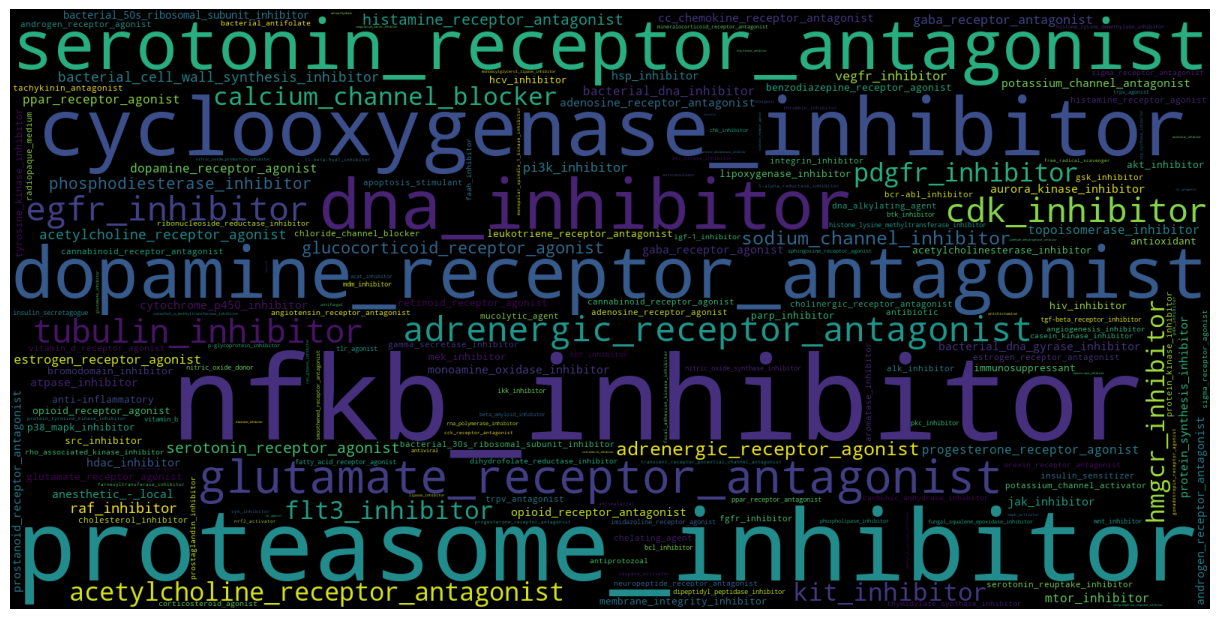

In [22]:
# WORD CLOUD FOR THE TARGETS IN 

from wordcloud import WordCloud
wrd_cloud_dict=dict(sorted_dict.items())
word_cloud = WordCloud(width = 1600, height = 800,).generate_from_frequencies(wrd_cloud_dict)
plt.figure(figsize = (12, 8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

- VISULALIZING THE OCCURENCE OF TARGETS IN VARIOUS SAMPLE USING WORDCLOUD . THE TARGETS APPEARING IN LARGE FONTS ARE MORE FREQUENT TO OCCUR WHILE THE FEATURES WITH RARE OCCURENCE HAVE FONT SIZE SMALLER AND SMALLER .

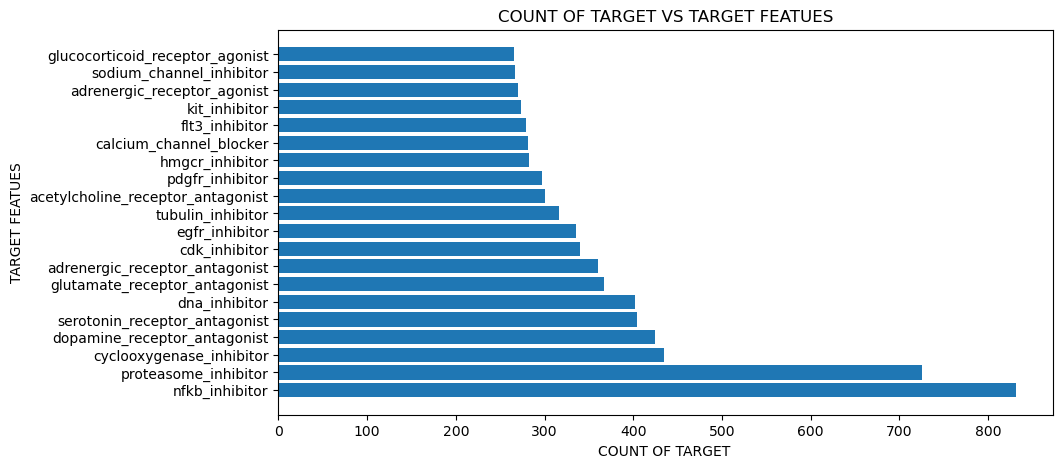

In [23]:
#BARPLOT WITH THE TOP 20 TARGETS

plt.figure(figsize=(10,5))
plt.barh(list(sorted_dict.keys())[:20], list(sorted_dict.values())[:20] )
plt.title('COUNT OF TARGET VS TARGET FEATUES')
plt.xlabel('COUNT OF TARGET ')
plt.ylabel('TARGET FEATUES')
plt.show()

- OBSERVING THE TOP 20 TARGET APPEARED IN THE DATASET OR SAMPLE .

FROM THE ABOVE BARPLOT WE COULD OBSERVE THE TARGETS nfkb_inhibitor OCCURING  MORE THAN 800 TIMES , protesome_inhibitor OCCURING MORE THAN 700 .THESE ARE THE TWO TARGETS FEATURE WHICH HAVE OCCURED MORE THAN ANY OTHER TARGETS ACROSS VARIOUS SAMPLES. SO IT MIGHT BE POSSIBLE , THE TEST DATA ALSO HAVE OCUURING OF THE TOP TARGET FEATURES .

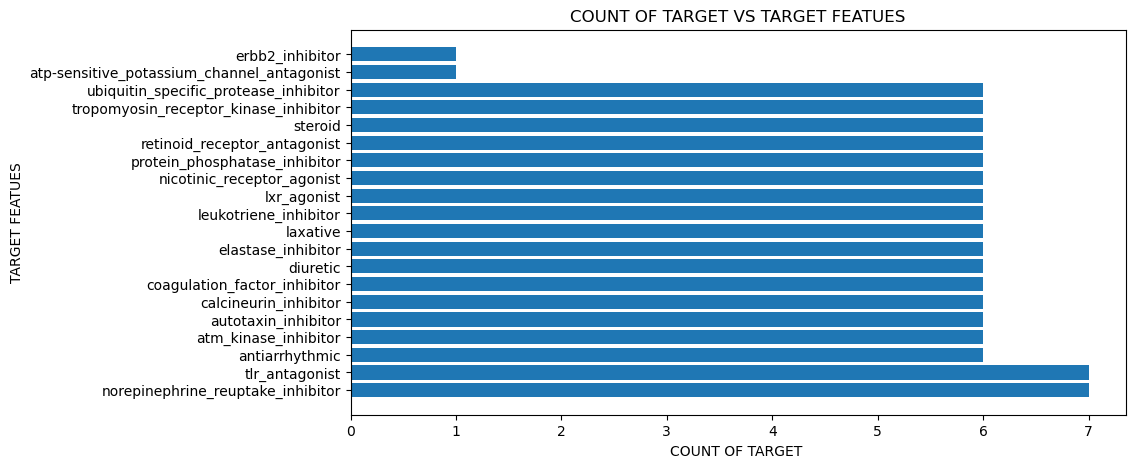

In [24]:
#BARPLOT WITH THE lowest 20 TARGETS

plt.figure(figsize=(10,5))
plt.barh(list(sorted_dict.keys())[-20:], list(sorted_dict.values())[-20:] )
plt.title('COUNT OF TARGET VS TARGET FEATUES')
plt.xlabel('COUNT OF TARGET ')
plt.ylabel('TARGET FEATUES')
plt.show()

- OBSERVING THE LOWEST 20 TARGET APPEARED IN THE DATASET OR SAMPLE .

FROM THE ABOVE BARPLOT WE COULD OBSERVE EVERY TARGETS IS ACTIVATED DURING MECHANISM OF ACTION .EVEN IN THE OVERVIEW OF CHALLENGE IT WAS MADE CLEAR THAT THE DRUG IS GIVEN 3 TIMES A DAY WITH 2 DOSES , SO THERE WOULD BE ATLEAST SIX TARGETS RELATED TO A DRUG .


In [25]:
feature = target.columns.values[1:]
feature[:3]

array(['5-alpha_reductase_inhibitor', '11-beta-hsd1_inhibitor',
       'acat_inhibitor'], dtype=object)

Text(0, 0.5, 'COUNT')

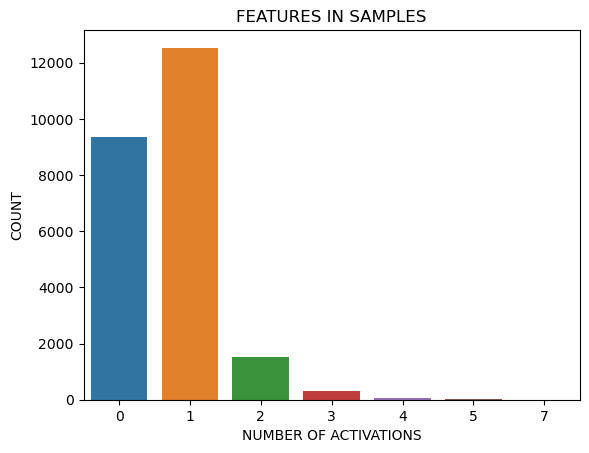

In [26]:
# Getting number of targets per sample

sns.countplot(target[feature].sum(axis = 1) )
plt.title('FEATURES IN SAMPLES')
plt.xlabel('NUMBER OF ACTIVATIONS')
plt.ylabel('COUNT')

- OBSERVING NUMBER OF TARGETS PER SAMPLE

MAXIMUM NUMBER OF TARGET PER SAMPLE IS 6.
SINCE THE TARGETS PRESENT CAN EITHER BE ACTIVATED OR NOT , WHEN A DRUG IS GIVEN TO THE SAMPLE .

MOST OF THE SAMPLES HAVE 0 OR 1 TARGETS . ABOUT 9OOO SAMPLES HAVE ZEROS IN ALL COLUMNS AND ABOUT 12,000 SAMPLES HAVE ONLY ONE TARGET IN ACTIVE STATE.PRESENCE OF ACTIVE SAMPLE PER TARGET IS VERY LOW (1 OR 2 PER SAMPLE) . YET THE MOA COUNTS REMAINS THE SAME 6 , THOUGH MAXIMUM GIVE IS 7 . 

IN SIMPLE WORDS , SAMPLES ARE CLASSIFIED TO BINARY TARGETS i.e. [0,1], BUT THERE IS A SMALL PART OF TRAINING SAMPLES CLASSIFIED TO 2, 3,4,5 AND 7 DIFFERENT TARGETS AT THE SAME TIME .

In [27]:
# Merging target into single column

target['total_cells_reacted'] = target.sum(axis=1)
target['cell_reaction'] = np.minimum(1,target['total_cells_reacted'])
target.tail()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,total_cells_reacted,cell_reaction
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
23810,id_fffb70c0c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
23811,id_fffc1c3f4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23812,id_fffcb9e7c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
23813,id_ffffdd77b,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Defining The Target Variable

target['cell_reaction'].value_counts()

1    14447
0     9367
Name: cell_reaction, dtype: int64

### CHECKING CORELATION AMONG FEATURES

- HERE WE WILL CHECK THE CORELATION AMONG FEATURES , TO SEE IF THERE IS A LINEAR RELATIONSHIP BETWEEN THERE VALUES .WE WOULD GET THE abs() value of corelation to show how strong is the corelation (positive or negative).TO REDUCE DIMENSIONS WE COULD DROP THE CORELATED FEATURES TO ENHANCE PERFORMANCE .

CPU times: user 53.1 s, sys: 182 ms, total: 53.3 s
Wall time: 53.3 s


<AxesSubplot:>

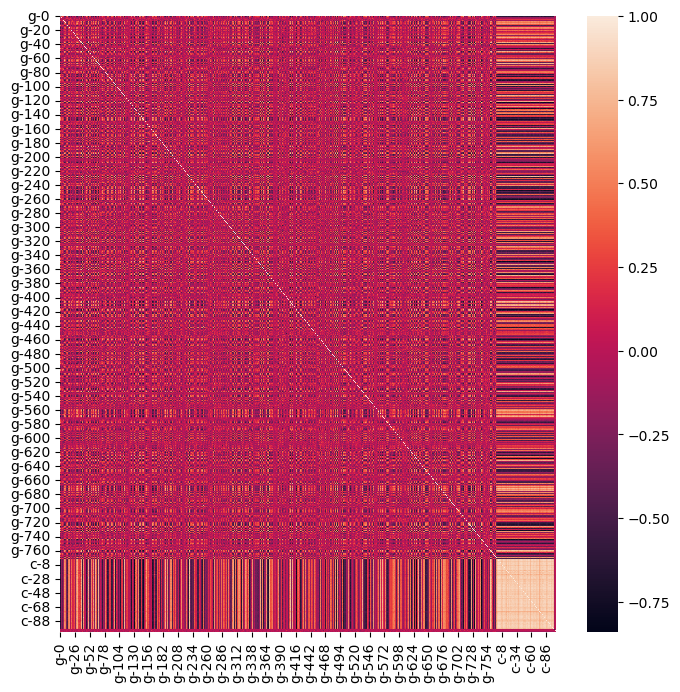

In [29]:
%%time

cor = train.drop(['sig_id'] , axis = 1) 
corelation = cor.corr()
plt.figure(figsize = (8 , 8))
sns.heatmap(corelation)

In [30]:
corelation.head()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,...,c-94,c-95,c-96,c-97,c-98,c-99,cp_time_48,cp_time_72,cp_dose_D2,cp_type_trt_cp
g-0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,...,-0.656116,-0.600758,-0.646784,-0.622840,-0.640484,-0.609238,0.021376,-0.004283,-0.046947,0.072139
g-1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,...,-0.042638,-0.011237,-0.022127,-0.008487,-0.002824,-0.002308,0.006337,0.034121,0.101326,0.066868
g-2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,...,-0.178312,-0.158105,-0.182540,-0.178812,-0.170152,-0.172124,-0.015527,-0.131898,-0.097255,0.053437
g-3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,...,-0.081073,-0.016778,-0.083846,-0.049951,-0.079855,-0.037579,-0.014863,-0.019365,0.020745,-0.002551
g-4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,...,-0.388885,-0.378084,-0.379085,-0.394904,-0.366693,-0.390581,0.015788,0.015463,-0.050323,0.091805


In [31]:
# GETTINGN THE FEATURES WHOSE CORELATION IS >0.9

correlated_features = set()
for i in range(len(corelation.columns)):
    for j in range(i):
        if(abs(corelation.iloc[i, j]) > 0.9):
            col_name = corelation.columns[i]
            correlated_features.add(col_name)
len(correlated_features), correlated_features

(28,
 {'c-11',
  'c-13',
  'c-2',
  'c-26',
  'c-31',
  'c-33',
  'c-38',
  'c-4',
  'c-40',
  'c-42',
  'c-51',
  'c-52',
  'c-54',
  'c-55',
  'c-60',
  'c-62',
  'c-63',
  'c-66',
  'c-73',
  'c-75',
  'c-81',
  'c-82',
  'c-85',
  'c-90',
  'c-93',
  'c-94',
  'c-96',
  'g-50'})

In [32]:
# drop correlated features
#THIS CODE WOULD DROP THE CORELATED FEATURES IN THE ORIGINAL DATA FRAME

# train.drop(labels = correlated_features, axis = 1, inplace = True)
# test.drop(labels = correlated_features, axis = 1, inplace = True)

In [33]:
train.shape

(23814, 877)

In [34]:
test.shape

(3982, 877)

#### Filter Methods For Feature selection

### VARIANCE THRESHOLD

 - VARIANCE IS DEFINED AS THE AVERAGE OF THE SQUARED DIFFERENCES FROM THE MEAN i.e MORE THE VARIANCE MORE THE INFORMATION . 
IF THE VARIANCE FOR A FEATURE IS LOW OR ZERO , THEN THE FEATURE IS CONSTANT AND WON'T INCREASE THE PERFORMANCE OF MODEL. SO TO IMPROVE THE PERFORMANCE OF THE MODEL , WE COULD DISCARD THE LOW VARIANCE FEATURES.

In [35]:
train.head(1)

,sig_id,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-94,c-95,c-96,c-97,c-98,c-99,cp_time_48,cp_time_72,cp_dose_D2,cp_type_trt_cp
0,id_000644bb2,1.062,0.5577,-0.2479,-0.6208,-0.1944,-1.012,-1.022,-0.0326,0.5548,...,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0,0,0,1


In [36]:
from tqdm import tqdm
var = []
for i in tqdm(train.columns[1:]):
    var.append(train[i].var())

variance = pd.DataFrame()
variance['Features'] = train.columns[1:]
variance['Variance'] = var
variance.head()

100%|██████████| 876/876 [00:00<00:00, 5554.55it/s]


,Features,Variance
0,g-0,1.941560
1,g-1,0.659934
2,g-2,1.072739
3,g-3,0.902523
4,g-4,1.065212


In [37]:
variance.sort_values(by = 'Variance' , ascending = True)

,Features,Variance
875,cp_type_trt_cp,0.072220
873,cp_time_72,0.220150
872,cp_time_48,0.226427
874,cp_dose_D2,0.249909
219,g-219,0.333275
...,...,...
50,g-50,5.093970
798,c-26,5.148048
790,c-18,5.266561
810,c-38,5.277933


In [38]:
x = train.iloc[:, 1:]

In [39]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold = .4)
constant_filter.fit(x)

VarianceThreshold(threshold=0.4)

In [40]:
len(x.columns[constant_filter.get_support()])

867

867 non constant feature , SO TO GET THE IMPORTANT FEATURES WE COULD REMOVE FEATURES HAVING VARIANCE LESS THEN 0.4 . 

## PCA

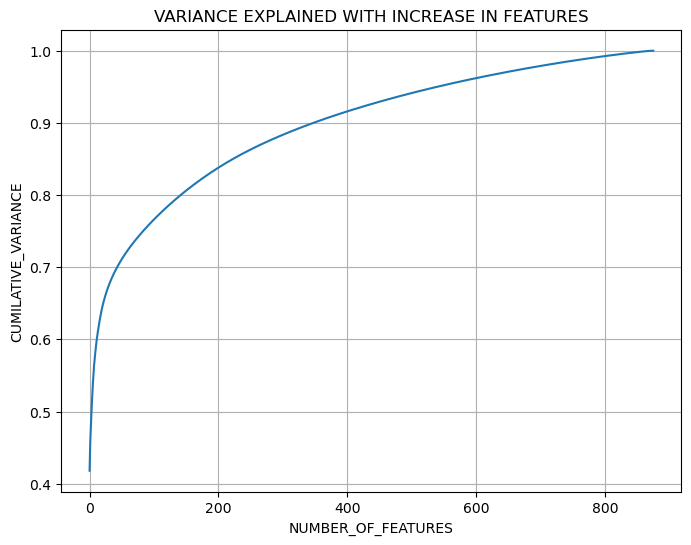

In [41]:
# PCA DIMENSIONALITY REDUCTION
#TRYING TO GET THE BEST DIMENSION FOR MAX VARIANCE 

trail = train.copy()
from sklearn.decomposition import PCA
pca = PCA()
pca.n_components = 876                            # USING ALL THE FEATURES
pca_data = pca.fit_transform(trail.iloc[: , 1:])

pca_variance = pca.explained_variance_
explained_var = pca.explained_variance_ / np.sum(pca.explained_variance_) # GIVES HOW MUCH VARIANCE IS GIVEN BY THE NO. OF FEAT

cum_variance = np.cumsum(explained_var) # GETTING CUMILATIVE VARIANCE (COMBINING FEATURES ONE BY ONE)

plt.figure(figsize = (8, 6))
plt.plot(cum_variance) 
plt.grid()
plt.title('VARIANCE EXPLAINED WITH INCREASE IN FEATURES')
plt.xlabel('NUMBER_OF_FEATURES')
plt.ylabel('CUMILATIVE_VARIANCE')
plt.show()


- OBSERVING VARIANCE EXPLAINED WITH INCREASE IN FEATURES

WE PERFORM PCA ON THE TRAIN DATA TO CHECK TILL WHAT DIMENSIONS OR FEATURES , WE GET HOW MUCH VARIANCE .

FROM THE ABOVE GRAPH , WE COULD OBSERVE WITH 200 DIMENSIONS WE COULD SEE VARIANCE UPTO 83% i.e WITH USING THE DIMENSIONS OF 200 WE HAVE THE INFORMATION OF 83%(approx) OF THE TOTAL DATA .FOR 90% OF VARIANCE , THE DIMENSIONS NEEDED IS APPOX(350) WHICH IS HALF OF THE TOTAL FEATURES PRESENT IN THE DATASET. ONE MORE THING TO OBSSERVE IS , WITH JUST 30 DIMENTIOONS WE HAVE THE VARIANCE OF 70% ,WHICH IS A VERY GOOD AMOUT OF INFORMATION


## Data Modeling

In [42]:
train_target = train.merge(target[['sig_id', 'cell_reaction']],  on='sig_id', how='inner')
train_target.head()

,sig_id,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-95,c-96,c-97,c-98,c-99,cp_time_48,cp_time_72,cp_dose_D2,cp_type_trt_cp,cell_reaction
0,id_000644bb2,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,...,0.6584,-0.3981,0.2139,0.3801,0.4176,0,0,0,1,1
1,id_000779bfc,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,...,0.4899,0.1522,0.1241,0.6077,0.7371,0,1,0,1,0
2,id_000a6266a,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,...,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,1,0,0,1,1
3,id_0015fd391,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,...,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,1,0,0,1,0
4,id_001626bd3,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,...,-0.3031,0.1094,0.2885,-0.3786,0.7125,0,1,1,1,1


### Defining Target column as Total number of cells reacted

In [43]:
inputs = train.drop(['sig_id'],axis=1)
y = target['total_cells_reacted']

In [44]:
target['total_cells_reacted'].value_counts()

1    12532
0     9367
2     1538
3      303
4       55
5       13
7        6
Name: total_cells_reacted, dtype: int64

In [45]:
x = target.drop(['sig_id'], axis=1).sum(axis=0).sort_values(ascending= False).reset_index()
x.head()

,index,0
0,total_cells_reacted,16844
1,cell_reaction,14447
2,nfkb_inhibitor,832
3,proteasome_inhibitor,726
4,cyclooxygenase_inhibitor,435


In [46]:
cols = target.columns
def get_classname(row):
    for col in cols:
        if(row[col] == 1 and col != 'sig_id'):
            return col
    return "No_cells_reacted"

target['final_col'] = target.apply(get_classname,axis=1)

In [47]:
target.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,total_cells_reacted,cell_reaction,final_col
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,gsk_inhibitor
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,No_cells_reacted
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,1,bcr-abl_inhibitor
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,No_cells_reacted
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,calcium_channel_blocker


In [48]:
target['final_col'].value_counts()

No_cells_reacted                              9367
nfkb_inhibitor                                 796
cyclooxygenase_inhibitor                       423
dopamine_receptor_antagonist                   418
dna_inhibitor                                  384
                                              ... 
caspase_activator                                6
laxative                                         6
retinoid_receptor_antagonist                     6
diuretic                                         6
atp-sensitive_potassium_channel_antagonist       1
Name: final_col, Length: 205, dtype: int64

In [49]:
inhib = "inhibitor"
antag = "antagonist"
agon = "agonist"

def get_classtypes(col):
    if inhib in col.lower():
        return inhib
    if antag in col.lower():
        return antag
    if agon in col.lower():
        return agon
    if col == "No_cells_reacted":
        return "No_cells_reacted"
    return "Other"
    
target['cell_type'] = target['final_col'].apply(get_classtypes)

In [50]:
target['cell_type'].value_counts()

No_cells_reacted    9367
inhibitor           7756
antagonist          3261
agonist             2118
Other               1312
Name: cell_type, dtype: int64

In [51]:
target['MoA_classtype'] = pd.factorize(target['cell_type'])[0]

In [52]:
target['MoA_classtype'].value_counts()

1    9367
0    7756
3    3261
4    2118
2    1312
Name: MoA_classtype, dtype: int64

In [53]:
inputs = train.drop(['sig_id'],axis=1)
y = target['MoA_classtype']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(inputs, y, test_size=0.20, random_state=41)

In [55]:
def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    dfs = []
    models = [
               
              ('RF', RandomForestClassifier(n_estimators=10)),
              ('RF_1', RandomForestClassifier(n_estimators=100)),
              ('RF_2', RandomForestClassifier(n_estimators=500)),
              ('GB',GradientBoostingClassifier(n_estimators=10))
              
              
            ]
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']

    for name, model in models:
        
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        # print(log_loss(y_test,y_pred))
        
        print(100*(y_test == y_pred).sum()/X_test.shape[0])

In [56]:
%%time
final = run_exps(X_train, y_train, X_test, y_test)

RF
47.44908671005669
RF_1
52.214990552173
RF_2
53.51669116103296
GB
51.92105815662398
CPU times: user 13min 49s, sys: 839 ms, total: 13min 49s
Wall time: 13min 50s


In [57]:
target.head(1)

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,total_cells_reacted,cell_reaction,final_col,cell_type,MoA_classtype
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,gsk_inhibitor,inhibitor,0


In [58]:
new_target = target.drop(labels = ['final_col', 'cell_type', 'MoA_classtype', 'cell_reaction', 'total_cells_reacted'], axis = 1)
new_target.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X = train.iloc[: , 1:]
y = new_target.iloc[: , 1:]
print(X.shape , y.shape)

(23814, 876) (23814, 206)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X , y,test_size=0.20, random_state = 0)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train ,test_size=0.20, random_state = 0)

In [10]:
print(X_train.shape , X_test.shape  , y_train.shape , y_test.shape)
print(X_cv.shape, y_cv.shape)

(15240, 876) (4763, 876) (15240, 206) (4763, 206)
(3811, 876) (3811, 206)


In [11]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 15240
Number of data points in test data: 4763
Number of data points in cross validation data: 3811


## ONE VS REST CLASSIFIER

Also known as one-vs-all, this strategy consists in fitting one classifier per class. For each classifier, the class is fitted against all the other classes . 

An intuitive approach to solving multi-label problem is to decompose it into multiple independent binary classification problems (one per category).The main assumption here is that the labels are mutually exclusive.

In [63]:
from sklearn.multiclass import OneVsRestClassifier

### Logistic Regression

In [64]:
%%time
from sklearn.linear_model import LogisticRegression
model = OneVsRestClassifier(LogisticRegression())

model.fit(X_train, y_train)

CPU times: user 41min 58s, sys: 16.9 s, total: 42min 15s
Wall time: 7min 4s


OneVsRestClassifier(estimator=LogisticRegression())

In [65]:
%%time
pred_cv = model.predict(X_cv)
pred_test = model.predict(X_test)
print("LOGLOSS FOR X_cv :",log_loss(y_cv, pred_cv))
print("LOGLOSS FOR X_test :",log_loss(y_test, pred_test))

LOGLOSS FOR X_cv : 7.974659323647949
LOGLOSS FOR X_test : 7.991067017348934
CPU times: user 32.6 s, sys: 292 ms, total: 32.9 s
Wall time: 5.51 s


### GaussianNB

In [67]:
%%time
from sklearn.naive_bayes import GaussianNB
model = OneVsRestClassifier(GaussianNB())

model.fit(X_train, y_train)

CPU times: user 33.7 s, sys: 15.6 s, total: 49.3 s
Wall time: 49.5 s


OneVsRestClassifier(estimator=GaussianNB())

In [68]:
%%time
pred_cv = model.predict(X_cv)
pred_test = model.predict(X_test)
print("LOGLOSS FOR X_cv :",log_loss(y_cv, pred_cv))
print("LOGLOSS FOR X_test :",log_loss(y_test, pred_test))

LOGLOSS FOR X_cv : 6.356088344216107
LOGLOSS FOR X_test : 6.790460838939522
CPU times: user 19.4 s, sys: 3.16 s, total: 22.6 s
Wall time: 22.6 s


### ExtraTreeClassifier

In [73]:
%%time
from sklearn.tree import ExtraTreeClassifier
model = OneVsRestClassifier(ExtraTreeClassifier())

model.fit(X_train, y_train)

CPU times: user 14.2 s, sys: 2.84 s, total: 17 s
Wall time: 17 s


OneVsRestClassifier(estimator=ExtraTreeClassifier())

In [75]:
%%time
pred_cv = model.predict(X_cv)
pred_test = model.predict(X_test)
print("LOGLOSS FOR X_cv :",log_loss(y_cv, pred_cv))
print("LOGLOSS FOR X_test :",log_loss(y_test, pred_test))

LOGLOSS FOR X_cv : 12.313948096572513
LOGLOSS FOR X_test : 12.069138867519442
CPU times: user 6.27 s, sys: 0 ns, total: 6.27 s
Wall time: 6.28 s


### SGDClassifier

In [77]:
%%time
from sklearn.linear_model import SGDClassifier
model = OneVsRestClassifier(SGDClassifier())

model.fit(X_train, y_train)

CPU times: user 2min 40s, sys: 4.46 s, total: 2min 45s
Wall time: 2min 45s


OneVsRestClassifier(estimator=SGDClassifier())

In [78]:
%%time
pred_cv = model.predict(X_cv)
pred_test = model.predict(X_test)
print("LOGLOSS FOR X_cv :",log_loss(y_cv, pred_cv))
print("LOGLOSS FOR X_test :",log_loss(y_test, pred_test))

LOGLOSS FOR X_cv : 7.981921875597161
LOGLOSS FOR X_test : 7.969885480817841
CPU times: user 32.2 s, sys: 280 ms, total: 32.5 s
Wall time: 5.44 s


### LinearSVC

In [84]:
%%time
from sklearn.svm import  LinearSVC
model = OneVsRestClassifier(LinearSVC())

model.fit(X_train, y_train)

CPU times: user 4min 43s, sys: 16.8 s, total: 5min
Wall time: 5min


OneVsRestClassifier(estimator=LinearSVC())

In [85]:
%%time
pred_cv = model.predict(X_cv)
pred_test = model.predict(X_test)
print("LOGLOSS FOR X_cv :",log_loss(y_cv, pred_cv))
print("LOGLOSS FOR X_test :",log_loss(y_test, pred_test))

LOGLOSS FOR X_cv : 10.55627479860727
LOGLOSS FOR X_test : 10.77548570192612
CPU times: user 31.7 s, sys: 264 ms, total: 32 s
Wall time: 5.35 s


## BINARY RELEVANCE 

In this case an ensemble of single-label binary classifiers is trained, one for each class. Each classifier predicts either the membership or the non-membership of one class. The union of all classes that were predicted is taken as the multi-label output.

If there’s q labels, the binary relevance method create q new data sets , one for each label and train single-label classifiers on each new data set.

In [86]:
from skmultilearn.problem_transform import BinaryRelevance

### GaussianNB

In [87]:
%%time
model = BinaryRelevance(GaussianNB())

model.fit(X_train, y_train)

CPU times: user 32.6 s, sys: 18.4 s, total: 51 s
Wall time: 51.1 s


BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])

In [88]:
%%time
pred_cv = model.predict(X_cv)
pred_test = model.predict(X_test)
print("LOGLOSS FOR X_cv :",log_loss(y_cv, pred_cv.toarray()))
print("LOGLOSS FOR X_test :",log_loss(y_test, pred_test.toarray()))

LOGLOSS FOR X_cv : 6.356088344216107
LOGLOSS FOR X_test : 6.790460838939522
CPU times: user 19 s, sys: 3.22 s, total: 22.2 s
Wall time: 22.3 s


## ADAPTED ALGORITHM

Adapting the algorithm to directly perform multi-label classification, rather than transforming the problem into 
different subsets of problems.
For example, multi-label version of kNN is represented by MLkNN. 

In [1]:
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix           #MODEL SHOWS ERROS SO USING FOR SPARSE MATRICES

In [12]:
%%time
model = MLkNN(k=20)

X_train = lil_matrix(X_train).toarray()
y_train = lil_matrix(y_train).toarray()
X_test = lil_matrix(X_test).toarray()

model.fit(X_train, y_train)

CPU times: user 1min 41s, sys: 955 ms, total: 1min 42s
Wall time: 1min 25s


MLkNN(k=20)

In [13]:
%%time
pred_cv = model.predict(X_cv)
pred_test = model.predict(X_test)
print("LOGLOSS FOR X_cv :",log_loss(y_cv, pred_cv.toarray()))
print("LOGLOSS FOR X_test :",log_loss(y_test, pred_test.toarray()))

LOGLOSS FOR X_cv : 3.641067221994666
LOGLOSS FOR X_test : 3.7592174317508262
CPU times: user 36.4 s, sys: 67.7 ms, total: 36.5 s
Wall time: 24.6 s


In [14]:
%%time
model = MLkNN(k=10)

X_train = lil_matrix(X_train).toarray()
y_train = lil_matrix(y_train).toarray()
X_test = lil_matrix(X_test).toarray()

model.fit(X_train, y_train)

CPU times: user 1min 32s, sys: 548 ms, total: 1min 32s
Wall time: 1min 15s


MLkNN()

In [15]:
%%time
pred_cv = model.predict(X_cv)
pred_test = model.predict(X_test)
print("LOGLOSS FOR X_cv :",log_loss(y_cv, pred_cv.toarray()))
print("LOGLOSS FOR X_test :",log_loss(y_test, pred_test.toarray()))

LOGLOSS FOR X_cv : 3.834064121896537
LOGLOSS FOR X_test : 3.9261539664678877
CPU times: user 36.8 s, sys: 36 ms, total: 36.8 s
Wall time: 24.6 s


## Result of models :


|No.|MODEL|LOG LOSS|
|-|-|-|
|1|ONE VS REST WITH LOGISTIC REGRESSION|7.99|
|2|ONE VS REST WITH GAUSSIANNB|6.79|
|3|ONE VS REST WITH ExtraTreeClassifier|12.069|
|4|ONE VS REST WITH SGDClassifier|7.97|
|5|ONE VS REST WITH LinearSVC|10.78|
|6|BINARY RELEVANCE WITH GAUSSIANNB|6.79|
|7|ADAPTED ALGO WITH MLKNN(K = 10)|3.92|
|7|ADAPTED ALGO WITH MLKNN(K = 20)|3.75|